In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

from os import listdir
from matplotlib import image

from sklearn.model_selection import train_test_split

In [3]:
moneda = 'BTC-USD'
window_MA = 30

loaded_images = pd.DataFrame(columns = ['IMG','Cluster'])
img = []
label = []
for filename in listdir('/home/sacbe/Bitmoney/test2/IMG/'+str(moneda)+'_'+str(window_MA)):
    img_data = image.imread('/home/sacbe/Bitmoney/test2/IMG/'+str(moneda)+'_'+str(window_MA)+'/'+filename)
    img.append(img_data)
    label.append(filename[-5])

loaded_images['IMG'] = img
loaded_images['Cluster'] = label

In [4]:
train, test = train_test_split(loaded_images, test_size=0.2)

train_img0 = np.asarray(train['IMG'])
test_img0 = np.asarray(test['IMG'])

train_img = np.arange(1024).reshape((32, 32))
test_img = np.arange(1024).reshape((32, 32))

for array in train_img0:
    train_img = np.concatenate([train_img, array])

for array in test_img0:
    test_img = np.concatenate([test_img, array])

train_img = np.delete(train_img, np.arange(32), axis=0)
test_img = np.delete(test_img, np.arange(32), axis=0)

train_img = train_img.reshape(-1,32,32,1)
test_img = test_img.reshape(-1,32,32,1)

train_cluster = np.asarray(train['Cluster']).astype('uint8')
test_cluster = np.asarray(test['Cluster']).astype('uint8')

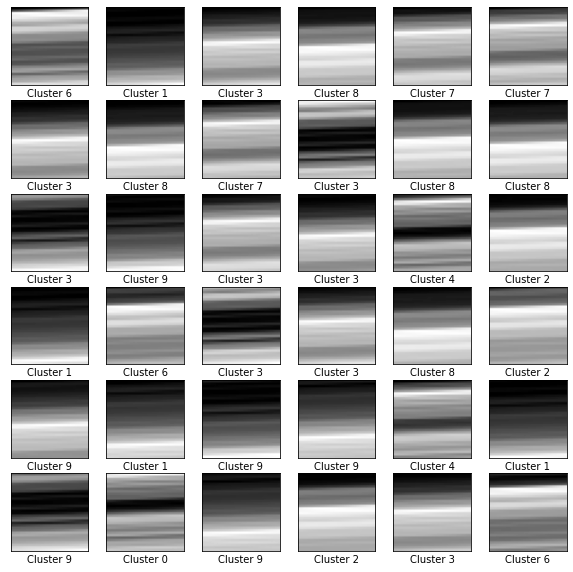

In [5]:
class_names = ['Cluster 0', 'Cluster 1', 'Cluster 2','Cluster 3','Cluster 4','Cluster 5','Cluster 6','Cluster 7','Cluster 8','Cluster 9']
#class_names = ['Cluster 0', 'Cluster 1', 'Cluster 2']

plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_img[i].reshape(32,32), cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_cluster[i]])
plt.show()

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(32, 32, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [7]:
model.add(layers.Flatten())
model.add(layers.Dense(2560, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 128)       36992     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 256)         295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 256)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_img, train_cluster, epochs=50,
                    validation_data=(test_img, test_cluster))

Epoch 1/50
17/17 [==============================] - 6s 362ms/step - loss: 2.0907 - accuracy: 0.1801 - val_loss: 1.8290 - val_accuracy: 0.2500
Epoch 2/50
17/17 [==============================] - 4s 253ms/step - loss: 1.4286 - accuracy: 0.4449 - val_loss: 1.1756 - val_accuracy: 0.5588
Epoch 3/50
17/17 [==============================] - 7s 440ms/step - loss: 0.9610 - accuracy: 0.6158 - val_loss: 1.3010 - val_accuracy: 0.4191
Epoch 4/50
17/17 [==============================] - 7s 384ms/step - loss: 0.9217 - accuracy: 0.6158 - val_loss: 0.6865 - val_accuracy: 0.7794
Epoch 5/50
17/17 [==============================] - 5s 286ms/step - loss: 0.6267 - accuracy: 0.7445 - val_loss: 0.4464 - val_accuracy: 0.8015
Epoch 6/50
17/17 [==============================] - 5s 319ms/step - loss: 0.4516 - accuracy: 0.8125 - val_loss: 0.3392 - val_accuracy: 0.8750
Epoch 7/50
17/17 [==============================] - 5s 296ms/step - loss: 0.4649 - accuracy: 0.7812 - val_loss: 0.4781 - val_accuracy: 0.7574
Epoch 

5/5 - 0s - loss: 0.0119 - accuracy: 0.9926


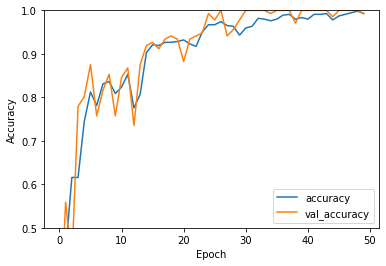

In [9]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_img,  test_cluster, verbose=2)

In [10]:
print(test_acc)

0.9926470518112183
